In [132]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import os
import sys

import librosa

In [133]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate):
    return librosa.effects.time_stretch(y=data,rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

In [134]:
def extract_feature(X,sr,mfcc=True,zcr=False,rmse=False,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
                    signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,chroma=False, mel=False, signal_skewness=False,signal_kurtosis=False):
    # X, sample_rate = librosa.load(file_path,duration=2.5,offset=0.6)
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        
    if zcr:
        zcr=np.squeeze(librosa.feature.zero_crossing_rate(X))
        result=np.hstack((result, zcr))
        
    if rmse:    
        rmse = np.mean(librosa.feature.rms(y=X), axis=1)
        result=np.hstack((result, rmse))
        
    if spectral_rolloff:
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=X, sr=sr), axis=1) 
        result=np.hstack((result, spectral_rolloff))  
    
    if spectral_contrast:
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sr).T, axis=0) 
        result=np.hstack((result, spectral_contrast)) 
        
    if spectral_bandwidth:
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=X, sr=sr), axis=1) 
        result=np.hstack((result, spectral_bandwidth)) 
        
    if spectral_centroid:
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=X, sr=sr), axis=1) 
        result=np.hstack((result, spectral_centroid)) 
        
    if signal_mean:
        signal_mean = np.mean(X)
        result=np.hstack((result, signal_mean))
        
    if signal_std:
        signal_std = np.std(X)
        result=np.hstack((result, signal_std))
        
    if signal_duration:
        signal_duration = librosa.get_duration(y=X, sr=sr)
        result=np.hstack((result, signal_duration))
        
    if temporal_centroid:
        temporal_centroid = np.sum(np.arange(len(X)) * X) / np.sum(X)
        result=np.hstack((result, temporal_centroid))
         
    if chroma:
        stft=np.abs(librosa.stft(X))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result=np.hstack((result, chroma))
        
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sr).T,axis=0)
        result=np.hstack((result, mel))
        
    if signal_skewness:
        signal_mean = np.mean(X)
        signal_std = np.std(X)
        skewness = np.mean((X - signal_mean) ** 3) / signal_std ** 3
        result=np.hstack((result, skewness))
        
    if signal_kurtosis:
        signal_mean = np.mean(X)
        signal_std = np.std(X)
        kurtosis = np.mean((X - signal_mean) ** 4) / signal_std ** 4
        result=np.hstack((result, kurtosis))
        
    
        
        
        
    return result

In [135]:
def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_feature(data,sr,mfcc=True,chroma=False, mel=False,zcr=False,rmse=False,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
                    signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,
                     signal_skewness=False,signal_kurtosis=False)
    audio=np.array(aud)
    
    # noised_audio=noise(data)
    # aud2=extract_feature(noised_audio,sr,mfcc=True,chroma=False, mel=False,zcr=False,rmse=True,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
    #                 signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,
    #                  signal_skewness=False,signal_kurtosis=False)
    # audio=np.vstack((audio,aud2))
    
    # # stretch_audio=stretch(data=data, rate=0.8)
    # # aud3=extract_feature(stretch_audio,sr,mfcc=True,zcr=True,rmse=True,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
    # #                 signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,
    # #                 chroma=True, mel=True, signal_skewness=False,signal_kurtosis=False)
    # # audio=np.vstack((audio,aud3))
    
    # shift_audio=shift(data)
    # aud4=extract_feature(shift_audio,sr,mfcc=True,chroma=False, mel=False,zcr=False,rmse=True,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
    #                 signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,
    #                  signal_skewness=False,signal_kurtosis=False)
    # audio=np.vstack((audio,aud4))
    
    # pitched_audio=pitch(data,sr)
    # aud5=extract_feature(pitched_audio,sr,mfcc=True,chroma=False, mel=False,zcr=False,rmse=True,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
    #                 signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,
    #                  signal_skewness=False,signal_kurtosis=False)
    # audio=np.vstack((audio,aud5))
    
    # pitched_audio1=pitch(data,sr)
    # pitched_noised_audio=noise(pitched_audio1)
    # aud6=extract_feature(pitched_noised_audio,sr,mfcc=True,chroma=False, mel=False,zcr=False,rmse=True,spectral_rolloff=False,spectral_contrast=False,spectral_bandwidth=False,spectral_centroid=False,
    #                 signal_mean=False,signal_std=False,signal_duration=False,temporal_centroid=False,
    #                  signal_skewness=False,signal_kurtosis=False)
    # audio=np.vstack((audio,aud6))
    
    return audio

In [136]:
# data_path=pd.read_csv(r"C:\Users\youss\Desktop\Speech Recognition\Code\Github\Ravdess_path.csv")
data_path=pd.read_csv(r"C:\Users\youss\Desktop\Speech Recognition\Code\1\RavTess.csv")

In [137]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    # if index%500==0:
    #     print(f'{index} audio has been processed')
    # for i in features:
    X.append(features)
    Y.append(emotion)
print('Done')

4240it [00:52, 81.48it/s] 

Done


In [138]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y

In [139]:
Emotions.shape

(4240, 41)

In [140]:
Df= Emotions.dropna(axis=1)
features=Df.drop('Emotions', axis=1)
labels=Df["Emotions"]

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [142]:
# Split the data into training and temporary sets (80% training, 20% temp)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(features,labels, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

In [154]:
print(y_train[10:20])

1596      angry
2003       fear
1955       fear
1325    neutral
2735        sad
3400       fear
848     neutral
948     disgust
2136      happy
1097      happy
Name: Emotions, dtype: object


In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [144]:
def Base_Model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv1D(64, 5, padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=4))

    model.add(Conv1D(128, 5, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=4))

    model.add(Conv1D(256, 5, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Flatten())

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model



In [145]:
# Define input shape and number of classes
input_shape = (X_train.shape[1], 1)  # Each audio frame has 40 features
num_classes = 8  # Number of classes (Neutral, Calm, Happy, Sad, Angry, Fearful, Disgust, Surprised)

# Create the model
model = Base_Model(input_shape, num_classes)
# opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\youss\miniconda3\envs\speech\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,672 (819.03 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath to save the best model
filepath = "best_model.keras"

# Define the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Compile your model before training
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train your model with the ModelCheckpoint callback
history = model.fit(X_train, y_train_encoded, epochs=200, validation_data=(X_val, y_val_encoded), callbacks=[checkpoint])

# After training, you can load the best model using:
# best_model = keras.models.load_model("best_model.h5")

Epoch 1/200


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3614 - loss: 1.6136
Epoch 1: val_accuracy improved from -inf to 0.69104, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3632 - loss: 1.6097 - val_accuracy: 0.6910 - val_loss: 0.9555
Epoch 2/200
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7163 - loss: 0.8533
Epoch 2: val_accuracy improved from 0.69104 to 0.74646, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7163 - loss: 0.8528 - val_accuracy: 0.7465 - val_loss: 0.7748
Epoch 3/200
76/80 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7520 - loss: 0.7151
Epoch 3: val_accuracy did not improve from 0.74646
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7521 - loss: 0.7135 - val_accuracy: 0.7358 - val_loss: 0.7018
Epoch 4/200
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7608 - loss: 0.6559
Epoch 4: val_accuracy improved from 0.74646 to 0.76887, saving model to best_model.keras
80/80

In [147]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8478 - loss: 1.0158
Test Loss: 0.9382721781730652
Test Accuracy: 0.8632075190544128
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
y_predict = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test_encoded, y_predict)
precision = precision_score(y_test_encoded, y_predict, average='weighted')
recall = recall_score(y_test_encoded, y_predict, average='weighted')
f1 = f1_score(y_test_encoded, y_predict, average='weighted')
print('Test Data accuracy: ',accuracy_score(y_test_encoded, y_predict)*100)
print('Test Data accuracy: ', accuracy * 100)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Data accuracy:  86.32075471698113
Test Data accuracy:  86.32075471698113
Precision:  0.8643420140524252
Recall:  0.8632075471698113
F1 Score:  0.8630591074131948


In [ ]:
from keras.layers import LSTM
def lstm_cnn(input_shape, num_classes):
# Define the combined model
    model = Sequential()

# Add a 1D CNN layer
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))
    
# Add a 1D CNN layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
# Add a 1D CNN layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

# Add an LSTM layer
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))

# Flatten the output of the LSTM layer
    model.add(Flatten())

# Fully Connected (FC) layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer with softmax activation
    model.add(Dense(num_classes, activation='softmax'))  # Assuming 8 emotion classes
    
    return model

In [ ]:
# Define input shape and number of classes
input_shape = (X_train.shape[1], 1)  # Each audio frame has 40 features
num_classes = 7  # Number of classes (Neutral, Calm, Happy, Sad, Angry, Fearful, Disgust, Surprised)

# Create the model
model = lstm_cnn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\youss\miniconda3\envs\speech\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 41, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 18, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 9, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 7, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,095 (941.78 KB)

 Trainable params: 240,711 (940.28 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath to save the best model
filepath = "best_model.keras"

# Define the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Compile your model before training
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train your model with the ModelCheckpoint callback
history = model.fit(X_train, y_train_encoded, epochs=300, validation_data=(X_val, y_val_encoded), callbacks=[checkpoint])

# After training, you can load the best model using:
# best_model = keras.models.load_model("best_model.h5")

Epoch 1/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5111 - loss: 1.3331
Epoch 1: val_accuracy improved from -inf to 0.75024, saving model to best_model.keras
398/398 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - accuracy: 0.5113 - loss: 1.3324 - val_accuracy: 0.7502 - val_loss: 0.6864
Epoch 2/300
397/398 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7236 - loss: 0.7587
Epoch 2: val_accuracy improved from 0.75024 to 0.78231, saving model to best_model.keras
398/398 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7237 - loss: 0.7585 - val_accuracy: 0.7823 - val_loss: 0.5835
Epoch 3/300
397/398 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7627 - loss: 0.6552
Epoch 3: val_accuracy improved from 0.78231 to 0.80236, saving model to best_model.keras
398/398 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7627 - loss: 0.6551 - val_accuracy: 0.8024 - val_loss: 0.5367
Epoch 4/300
397/398 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7855 - loss: 0.5954
Epoch 4: val_accuracy impro

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test)

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9616 - loss: 0.1388
Test Loss: 0.13272742927074432
Test Accuracy: 0.963443398475647
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


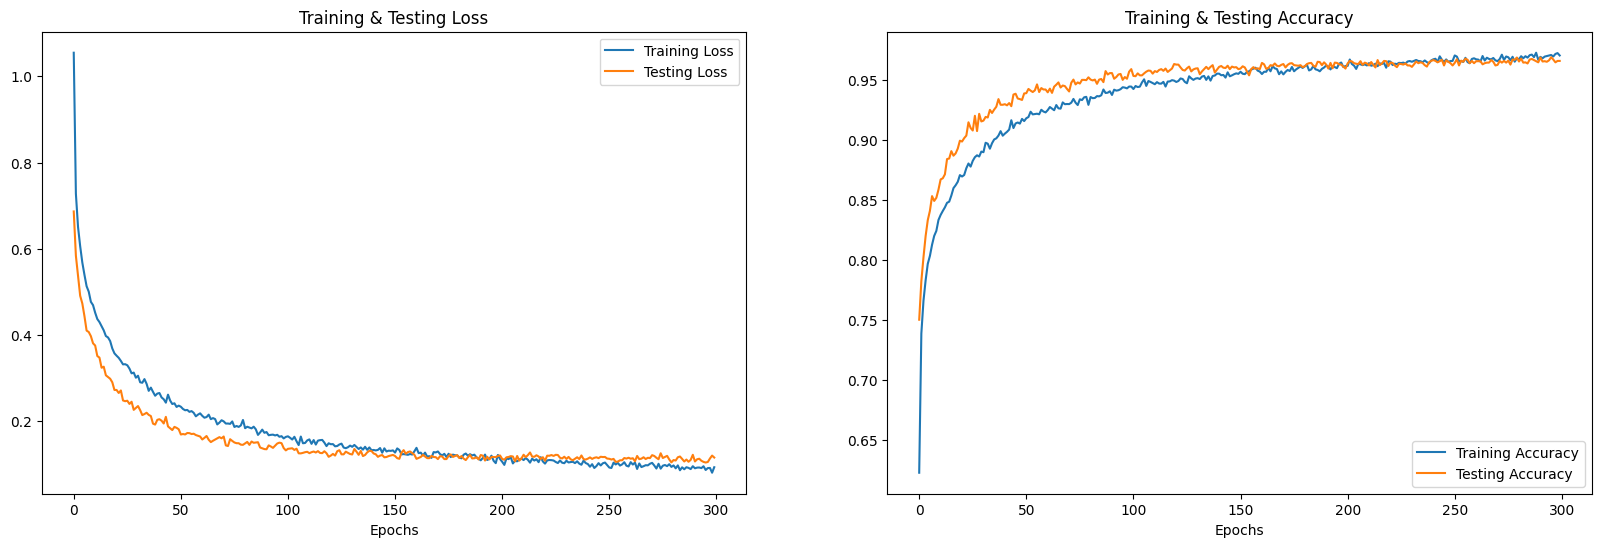

In [ ]:
# print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test_encoded)[1]*100 , "%")
import matplotlib.pyplot as plt
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
y_predict = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test_encoded, y_predict)
precision = precision_score(y_test_encoded, y_predict, average='weighted')
recall = recall_score(y_test_encoded, y_predict, average='weighted')
f1 = f1_score(y_test_encoded, y_predict, average='weighted')

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
y_predict = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test_encoded, y_predict)
precision = precision_score(y_test_encoded, y_predict, average='weighted')
recall = recall_score(y_test_encoded, y_predict, average='weighted')
f1 = f1_score(y_test_encoded, y_predict, average='weighted')
print('Test Data accuracy: ',accuracy_score(y_test_encoded, y_predict)*100)
print('Test Data accuracy: ', accuracy * 100)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Test Data accuracy:  96.34433962264151
Test Data accuracy:  96.34433962264151
Precision:  0.9635232163609705
Recall:  0.9634433962264151
F1 Score:  0.9634304711897994


In [ ]:
print(classification_report(y_test_encoded, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       600
           1       0.98      0.97      0.97       624
           2       0.96      0.98      0.97       603
           3       0.97      0.96      0.96       592
           4       0.95      0.96      0.96       668
           5       0.96      0.94      0.95       586
           6       0.96      0.98      0.97       567

    accuracy                           0.96      4240
   macro avg       0.96      0.96      0.96      4240
weighted avg       0.96      0.96      0.96      4240

